### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#### Train the network

In [2]:
n = 10
popsize = 10
generations = 1000
name = 'centered4'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize)

2023-02-07 16:29:32,486	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-07 16:29:34] INFO     <50273> evotorch.core: Instance of `Custom_NEProblem` (id:11203200192) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-07 16:29:34] INFO     <50273> evotorch.core: Instance of `Custom_NEProblem` (id:11203200192) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-07 16:29:34] INFO     <50273> evotorch.core: Instance of `Custom_NEProblem` (id:11203200192) -- The `device` of the problem is set as cpu
[2023-02-07 16:29:34] INFO     <50273> evotorch.core: Instance of `Custom_NEProblem` (id:11203200192) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-07 16:29:34] INFO     <50273> evotorch.core: Instance of `Custom_NEProblem` (id:11203200192) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0982)
  median_eval : 25.457412719726562
pop_best_eval : 102.2725601196289
    mean_eval : -21.497243881225586
    best_eval : 102.2725601196289
   worst_eval : -220.5306396484375

         iter : 2
     stepsize : ReadOnlyTensor(0.0966)
  median_eval : 17.831817626953125
pop_best_eval : 131.398193359375
    mean_eval : 13.964167594909668
    best_eval : 131.398193359375
   worst_eval : -220.5306396484375

         iter : 3
     stepsize : ReadOnlyTensor(0.0952)
  median_eval : 0.2261810302734375
pop_best_eval : 160.67654418945312
    mean_eval : 14.5721435546875
    best_eval : 160.67654418945312
   worst_eval : -220.5306396484375

         iter : 4
     stepsize : ReadOnlyTensor(0.0939)
  median_eval : -58.91535949707031
pop_best_eval : 142.63742065429688
    mean_eval : -121.7813491821289
    best_eval : 160.67654418945312
   worst_eval : -700.4557495117188

         iter : 5
     stepsize : ReadOnlyTensor(0.0928)
  median_eval : -5

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'])

#### Visualize trained network

In [11]:
organism = generate_organism(n*2, device)
graph = organism.toGraph()
visualizer = Visualizer()

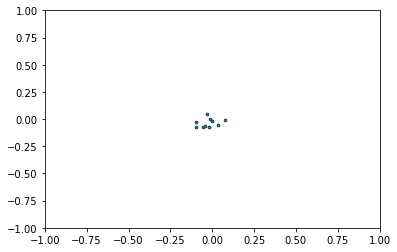

In [12]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim.to_jshtml())

In [8]:
#anim.save('../animation/centered2.gif', writer='imagemagick', fps=10)
visualizer.save_animation_to_gif(anim, name, 10)

In [9]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

In [10]:
x = torch.tensor([1.0, 1.0])
y = torch.tensor([3.0, 3.0])
print(((x[0]-y[0])**2+(x[1]-y[1])**2)**0.5)
print((x-y).norm())

tensor(2.8284)
tensor(2.8284)
